# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

8. <font size="3.5">[Level broadening](#eighth-chapter)<br></font>
    8.1. [Open systems](#8.1)<br>
    8.2. [Local density of states](#8.2)<br>
    8.4. [What constitutes a contact (reservoir)?](#8.4)<br>
    8.E. [Exercises](#8.E)<br>
    
[_References_](#references)<br>

***

# 8. Level broadening <a id="eighth-chapter"></a>

## <font color = "navy" >8.1 Open systems </font> <a id="8.1"></a>

<font color = "olive"> <u> 
- Previous variables are killed and a fresh start is conducted.</u> </font>

In [150]:
%reset -f 
%matplotlib inline
from pylab import *

In [151]:
E=linspace(-0.3,0.3,50001); dE=E[1]-E[0]; gam=0.05;
D=(gam/(2*pi))/(((E-0.14)**2)+((gam/2)**2));
D=D+(gam/(2*pi))/(((E-0.04)**2)+((gam/2)**2));
D=D+((gam/(2*pi))/(((E+0.06)**2)+((gam/2)**2)));
D=D+(gam/(2*pi))/(((E+0.15)**2)+((gam/2)**2));

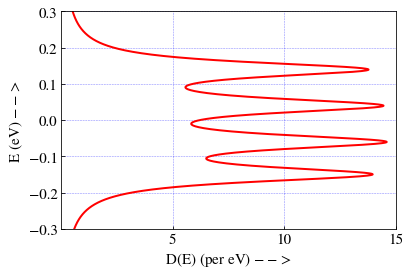

In [152]:
plot(D,E,'r',lw=2)
xlabel(' D(E) (per eV) $-->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(0,15)
ylim(-0.3,0.3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(5,20,5))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 8.1__ A channel connected to one contact. The set of discrete levels broaden into a continuous density of states as shown. </font>

***

## <font color = "navy" >8.2 Local density of states </font> <a id="8.2"></a>

In [153]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [154]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; mu=0.25; kT=0.025;

#inputs
a=2e-10; t0=(hbar**2)/(2*m*(a**2)*q); Np=50;
X=a*linspace(0,Np-1,Np); U=linspace(-0.05,0.05,Np);
H=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)); 
H=H+diag(U);

HP=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)); 
HP=HP+diag(U);
HP[0,Np-1]=-t0; HP[Np-1,0]=-t0;

[D,V]=eigh(HP);
rho=1/(1+exp((D-mu)/kT)); 
rho=dot(dot(V,diag(rho)),transpose(V)); x=rho; rho=diag(rho)/a;

#Energy grid for Green’s function method
Emin=-0.1; Emax=0.4; NE=250; E=linspace(Emin,Emax,NE); dE=E[1]-E[0]; zplus=1j*1e-12;
f=1/(1+exp((E-mu)/kT));

#Green’s function method
sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); n=zeros((Np));

for k in range(0,NE):
    ck=(1-((E[k]+zplus-U[0])/(2*t0))); ka=cmath.acos(ck);
    sigma=-t0*exp(1j*ka); sig1[0,0]=sigma;
    ck=(1-((E[k]+zplus-U[Np-1])/(2*t0))); ka=cmath.acos(ck);
    sigma=-t0*exp(1j*ka); sig2[Np-1,Np-1]=sigma;
    G=inv(((E[k]+zplus)*eye(Np))-H-sig1-sig2);
    n=n+(f[k]*(dE*real(diag(1j*(G-conj(transpose(G)))))/(2*pi*a)));

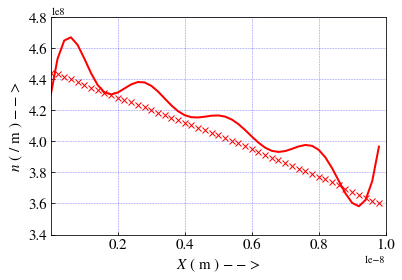

In [155]:
plot(X,rho,'r',lw=2)
plot(X,transpose(n),'rx',lw=2)
xlabel(' $X$ ( m ) $-->$ ',fontsize=15)
ylabel(' $n$ ( / m ) $-->$ ',fontsize=15)
xlim(0,1e-8)
ylim(3.4e8,4.8e8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2e-8,1.2e-8,0.2e-8))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 8.2.5__ Plot of electron density $n(z)$ calculated for a 1D wire with a linear potential $U(z)$ using periodic boundary conditions (solid curve) and using the self-energy method to enforce open boundary conditions (crosses). </font>

***

In [156]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [157]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; mu=0.25; kT=0.025;

#inputs
a=2e-10; t0=(hbar**2)/(2*m*(a**2)*q); Np=50;
X=a*linspace(0,Np-1,Np); U=linspace(-0.05,0.05,Np);
H=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
H=H+diag(U);

#Energy grid for Green’s function method
Emin=-0.1; Emax=0.4; NE=250; E=linspace(Emin,Emax,NE); dE=E[1]-E[0]; zplus=1j*1e-12;
f=1/(1+exp((E-mu)/kT));

#Green’s function method
sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex);

#Initializing arrays
D1=zeros((NE)); D2=zeros((NE));

for k in range(0,NE):
    ck=(1-((E[k]+zplus-U[1])/(2*t0))); ka=cmath.acos(ck);
    sigma=-t0*exp(1j*ka); sig1[0,0]=sigma;
    ck=(1-((E[k]+zplus-U[Np-1])/(2*t0))); ka=cmath.acos(ck);
    sigma=-t0*exp(1j*ka); sig2[Np-1,Np-1]=sigma;
    G=inv(((E[k]+zplus)*eye(Np))-H-sig1-sig2);
    D0=real(diag(1j*(G-conj(transpose(G)))/(2*pi))); D1[k]=D0[0]; D2[k]=D0[Np-1];

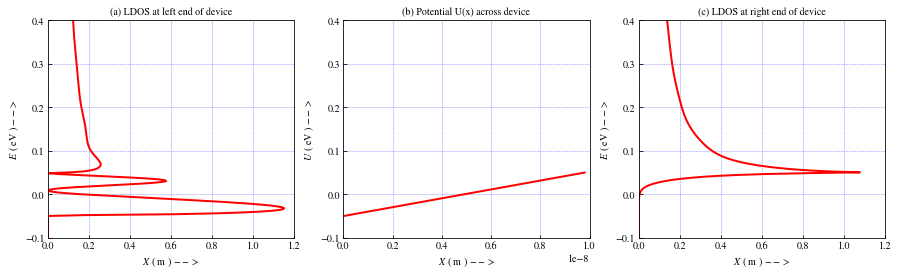

In [158]:
figure(figsize=(15,4))
subplot(1,3,1)
plot(D1,E,'r',lw=2)
xlabel(' $X$ ( m ) $-->$ ',fontsize=10)
ylabel(' $E$ ( eV ) $-->$ ',fontsize=10)
xlim(0,1.2)
ylim(-0.1,0.4)
tick_params(axis='both',which='major',labelsize=10,direction='in')
title('(a) LDOS at left end of device',fontsize=10)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,3,2)
plot(X,U,'r',lw=2)
xlabel(' $X$ ( m ) $-->$ ',fontsize=10)
ylabel(' $U$ ( eV ) $-->$ ',fontsize=10)
xlim(0,1e-8)
ylim(-0.1,0.4)
tick_params(axis='both',which='major',labelsize=10,direction='in')
title('(b) Potential U(x) across device',fontsize=10)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,3,3)
plot(D2,E,'r',lw=2)
xlabel(' $X$ ( m ) $-->$ ',fontsize=10)
ylabel(' $E$ ( eV ) $-->$ ',fontsize=10)
xlim(0,1.2)
ylim(-0.1,0.4)
tick_params(axis='both',which='major',labelsize=10,direction='in')
title('(c) LDOS at right end of device',fontsize=10)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 8.2.6__ Local density of states (LDOS) at two ends of a 1D wire with a  linear potential $U(x)$ impressed across it. The corresponding electron density is shown in Fig. 8.2.5. $\mu$ = $E_c$ + 0.25 eV and $k_BT$ = 0.025 eV. </font>

***

## <font color = "navy" >8.4 What constitutes a contact (reservoir)? </font> <a id="8.4"></a>

In [159]:
%reset -f
%matplotlib inline
from pylab import *

In [160]:
ep=-0.25; ep1=0.25; t=0.5; eta=0.025;
H=[[ep,t],[t,ep1]];
E=linspace(-1,1,201);

#Initializing arrays
D=zeros((201));

for kE in range (0,201):
    G=inv(((E[kE]+(1j*eta))*eye(2,2))-H);
    A=real(diag(1j*(G-conj(transpose(G))))); 
    D[kE]=A[0];

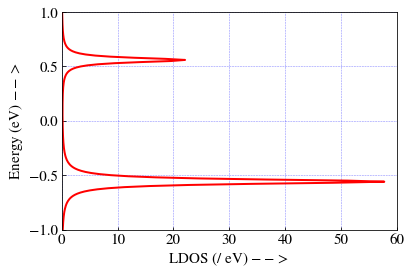

In [161]:
plot(D,E,'r',lw=2)
xlabel(' LDOS (/ eV) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(0,60)
ylim(-1,1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 8.4.1__ LDOS at site 1 </font>

***

## <font color = "navy" >Exercises </font> <a id="8.E"></a>

In [162]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [163]:
t0=1; zplus=1e-10;
NE=81; X=linspace(-1,3,NE);

#Initializing arrays
sig=zeros((NE),dtype=complex); 

for kE in range (0,NE):
    E=2*X[kE]; 
    ck=1-((E+zplus)/(2*t0)); ka=cmath.acos(ck);
    
    if imag(ka) < 0:
        ka=conj(transpose(ka));
    
    sig[kE]=-t0*exp(1j*ka);

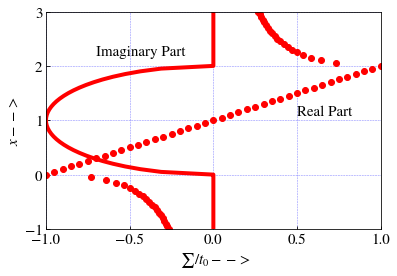

In [164]:
plot(real(sig),X,'ro',lw=1)
plot(imag(sig),X,'r',lw=4)
xlabel('  $\sum/t_0 -->$ ',fontsize=15)
ylabel(' $x -->$ ',fontsize=15)
xlim(-1,1)
ylim(-1,3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(-0.7,2.2,'Imaginary Part',fontsize=15)
text(0.5,1.1,'Real Part',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.8.2__ </font>

***

In [165]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [166]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; zplus=1j*5e-3;

#inputs
a=2.5e-10; t0=(hbar**2)/(2*m*(a**2)*q); Np=100;
X=a*linspace(0,Np-1,Np); U=zeros((Np));
U[Np//2]=5/(a*1e10);
H=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
H=H+diag(U);

In [167]:
E=0.01;

#Green’s function method
sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex);
ck=(1-((E+zplus-U[1-1])/(2*t0))); ka=cmath.acos(ck);
sigma=-t0*exp(1j*ka); sig1[0,0]=sigma;
ck=(1-((E+zplus-U[Np-1])/(2*t0))); ka=cmath.acos(ck);
sigma=-t0*exp(1j*ka); sig2[Np-1,Np-1]=sigma; 
G=inv(((E+zplus)*eye(Np))-H-sig1-sig2);
D01=real(diag(1j*(G-conj(transpose(G))))/(2*pi));

In [168]:
E=0.1;

#Green’s function method
sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex);
ck=(1-((E+zplus-U[1-1])/(2*t0))); ka=cmath.acos(ck);
sigma=-t0*exp(1j*ka); sig1[0,0]=sigma;
ck=(1-((E+zplus-U[Np-1])/(2*t0))); ka=cmath.acos(ck);
sigma=-t0*exp(1j*ka); sig2[Np-1,Np-1]=sigma; 
G=inv(((E+zplus)*eye(Np))-H-sig1-sig2);
D02=real(diag(1j*(G-conj(transpose(G))))/(2*pi));

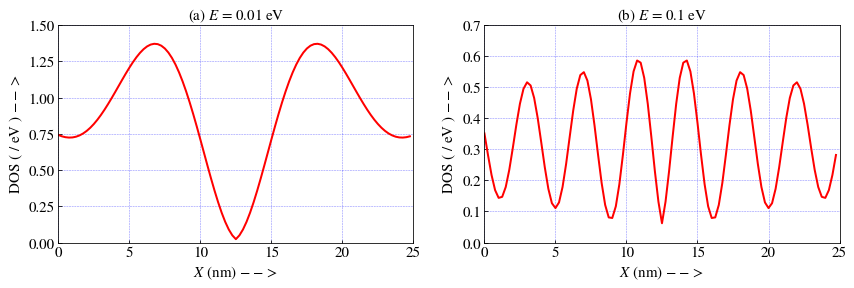

In [169]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(X/1e-9,D01,'r',lw=2)
xlabel(' $X$ (nm) $-->$ ',fontsize=15)
ylabel(' DOS ( / eV ) $-->$ ',fontsize=15)
xlim(0,25)
ylim(0,1.5)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('(a) $E$ = 0.01 eV',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(X/1e-9,D02,'r',lw=2)
xlabel(' $X$ (nm) $-->$ ',fontsize=15)
ylabel(' DOS ( / eV ) $-->$ ',fontsize=15)
xlim(0,25)
ylim(0,0.7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('(b) $E$ = 0.1 eV',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.8.5__ </font>

***

## _References_ </u><a id="references"></a>

<font color = "stone"><font size = "3" > 
- Datta, S. (2005). Quantum Transport: Atom to Transistor. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139164313 
- Datta, S. “Fundamentals of Nanoelectronics: Basic Concepts”. MOOC offered by the Purdue University. <br>
[Online] https://courses.edx.org/courses/PurdueX/nano520/3T2015/course/
- Datta, S. “Fundamentals of Nanoelectronics, Part B: Quantum Transport”. MOOC offered by the Purdue University. <br> 
[Online] https://courses.edx.org/courses/course-v1:PurdueX+nano521x+2015_T3/course/</font>